Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.

In this project, you will put yourself in the shoes of a data analyst performing an exploratory analysis on the data. You will take a look at two of the major parts of the data analysis process: data wrangling and exploratory data analysis. But before you even start looking at data, think about some questions you might want to understand about the bike share data. Consider, for example, if you were working for Bay Area Bike Share: what kinds of information would you want to know about in order to make smarter business decisions? Or you might think about if you were a user of the bike share service. What factors might influence how you would want to use the service?

In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding using feature-engine
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [69]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

In [71]:
 pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [72]:
from datetime import datetime

In [73]:
J201309tripdata = pd.read_csv('201309_trip_data.csv')
J201309tripsummarydata= pd.read_csv('201309_trip_summary.csv')
J201402stationdata = pd.read_csv('201402_station_data.csv')
J201402tripdata = pd.read_csv('201402_trip_data.csv')
J201402weatherdata = pd.read_csv('201402_weather_data.csv')
J201408trip_data = pd.read_csv('201408_trip_data.csv')
J201408weatherdata = pd.read_csv('201408_weather_data.csv')
J201508stationdata = pd.read_csv('201508_station_data.csv')
J201508tripdata = pd.read_csv('201508_trip_data.csv')
J201508weatherdata = pd.read_csv('201508_weather_data.csv')

In [74]:
J201309tripdata.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [75]:
J201309tripdata['Start Date'] = pd.to_datetime(J201309tripdata['Start Date'])
J201309tripdata['End Date'] = pd.to_datetime(J201309tripdata['End Date'])


In [76]:
J201309tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27345 entries, 0 to 27344
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Trip ID            27345 non-null  int64         
 1   Duration           27345 non-null  int64         
 2   Start Date         27345 non-null  datetime64[ns]
 3   Start Station      27345 non-null  object        
 4   Start Terminal     27345 non-null  int64         
 5   End Date           27345 non-null  datetime64[ns]
 6   End Station        27345 non-null  object        
 7   End Terminal       27345 non-null  int64         
 8   Bike #             27345 non-null  int64         
 9   Subscription Type  27345 non-null  object        
 10  Zip Code           25293 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 2.3+ MB


In [77]:
J201309tripsummarydata

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,Thu,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,Thu,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,Thu,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,Thu,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,Thu,San Francisco,San Francisco,Subscriber
...,...,...,...,...,...,...,...,...,...
27340,75.700000,2013-09-30,2013,9,23,Mon,San Francisco,San Francisco,Customer
27341,75.500000,2013-09-30,2013,9,23,Mon,San Francisco,San Francisco,Customer
27342,11.116667,2013-09-30,2013,9,23,Mon,San Francisco,San Francisco,Subscriber
27343,3.933333,2013-09-30,2013,9,23,Mon,San Francisco,San Francisco,Subscriber


In [78]:
J201402stationdata

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014


In [79]:
J201402tripdata 

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
...,...,...,...,...,...,...,...,...,...,...,...
144010,198771,385,2/28/2014 22:15,Powell Street BART,39,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404
144011,198772,145,2/28/2014 22:38,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111
144012,198773,677,2/28/2014 22:45,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102
144013,198774,64128,2/28/2014 23:01,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124


In [80]:
J201402tripdata ['Start Date'] = pd.to_datetime(J201402tripdata ['Start Date'])
J201402tripdata ['End Date'] = pd.to_datetime(J201402tripdata ['End Date'])


In [81]:
J201402tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Trip ID            144015 non-null  int64         
 1   Duration           144015 non-null  int64         
 2   Start Date         144015 non-null  datetime64[ns]
 3   Start Station      144015 non-null  object        
 4   Start Terminal     144015 non-null  int64         
 5   End Date           144015 non-null  datetime64[ns]
 6   End Station        144015 non-null  object        
 7   End Terminal       144015 non-null  int64         
 8   Bike #             144015 non-null  int64         
 9   Subscription Type  144015 non-null  object        
 10  Zip Code           137885 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.1+ MB


In [82]:
J201402weatherdata 

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28.0,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35.0,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31.0,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29.0,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30.0,0,6,NaN,277,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,2/24/2014,73,59,44,48,43,40,89,61,33,...,10,10,15,3,18.0,0,1,NaN,291,95113
916,2/25/2014,66,55,44,48,45,43,100,76,52,...,8,3,14,6,16.0,0,4,NaN,163,95113
917,2/26/2014,61,57,52,57,51,45,100,83,66,...,9,3,29,13,40.0,0.68,7,Rain,129,95113
918,2/27/2014,65,59,52,54,48,44,83,66,48,...,10,9,26,10,36.0,0.01,6,Rain,123,95113


In [83]:
J201408trip_data 

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,432946,406,8/31/2014 22:31,Mountain View Caltrain Station,28,8/31/2014 22:38,Castro Street and El Camino Real,32,17,Subscriber,94040
1,432945,468,8/31/2014 22:07,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,509,Customer,11231
2,432944,534,8/31/2014 22:06,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,342,Customer,11231
3,432942,1041,8/31/2014 21:45,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,603,Customer,94521
4,432941,1091,8/31/2014 21:44,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,598,Customer,94521
...,...,...,...,...,...,...,...,...,...,...,...
171787,198780,429,3/1/2014 0:42,Spear at Folsom,49,3/1/2014 0:49,Broadway St at Battery St,82,395,Subscriber,94105
171788,198779,179,3/1/2014 0:22,Powell Street BART,39,3/1/2014 0:25,Market at 4th,76,439,Subscriber,94107
171789,198778,224,3/1/2014 0:21,Civic Center BART (7th at Market),72,3/1/2014 0:25,Golden Gate at Polk,59,380,Subscriber,94103
171790,198777,445,3/1/2014 0:16,San Francisco Caltrain (Townsend at 4th),70,3/1/2014 0:23,Embarcadero at Bryant,54,268,Subscriber,94105


In [84]:
J201402tripdata ['Start Date'] = pd.to_datetime(J201402tripdata ['Start Date'])
J201402tripdata ['End Date'] = pd.to_datetime(J201402tripdata ['End Date'])


In [85]:
J201408weatherdata

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,3/1/2014,69,62,54,54.0,48.0,44.0,78.0,63.0,48.0,...,10.0,10.0,17,10,25.0,0.03,7,Rain,108,94107
1,3/2/2014,61,57,53,55.0,51.0,47.0,83.0,75.0,67.0,...,9.0,2.0,20,9,26.0,0.02,6,Rain,181,94107
2,3/3/2014,61,56,50,52.0,49.0,47.0,89.0,77.0,64.0,...,10.0,9.0,18,6,28.0,0.1,7,Rain,135,94107
3,3/4/2014,66,61,55,54.0,52.0,49.0,86.0,77.0,67.0,...,10.0,7.0,17,5,NaN,T,7,Rain,16,94107
4,3/5/2014,66,60,54,58.0,54.0,48.0,93.0,73.0,52.0,...,8.0,2.0,20,6,23.0,0.26,8,Rain,211,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,8/27/2014,83,72,60,59.0,56.0,52.0,84.0,60.0,36.0,...,10.0,10.0,16,6,20.0,0,0,NaN,282,95113
916,8/28/2014,82,71,60,60.0,58.0,55.0,90.0,66.0,42.0,...,9.0,7.0,15,6,26.0,0,2,NaN,309,95113
917,8/29/2014,83,72,60,60.0,58.0,56.0,90.0,65.0,40.0,...,9.0,7.0,21,5,24.0,0,6,NaN,304,95113
918,8/30/2014,86,74,61,59.0,56.0,50.0,90.0,62.0,34.0,...,10.0,10.0,21,6,24.0,0,1,NaN,317,95113


In [86]:
J201508stationdata

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [87]:
J201508tripdata 

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
354148,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


In [88]:
J201508weatherdata

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,9/1/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0,0.0,NaN,290.0,94107
1,9/2/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0,5.0,NaN,290.0,94107
2,9/3/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0,4.0,NaN,276.0,94107
3,9/4/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0,5.0,NaN,301.0,94107
4,9/5/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0,4.0,NaN,309.0,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,8/27/2015,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,23.0,6.0,29.0,0,3.0,NaN,313.0,95113
1821,8/28/2015,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,25.0,7.0,30.0,0,3.0,NaN,307.0,95113
1822,8/29/2015,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,21.0,9.0,26.0,0,4.0,NaN,312.0,95113
1823,8/30/2015,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,22.0,10.0,29.0,0,3.0,NaN,291.0,95113


In [89]:
tripdata = pd.concat([J201309tripdata,J201402tripdata,J201408trip_data,J201508tripdata])
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697304 entries, 0 to 354151
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Trip ID            697304 non-null  int64 
 1   Duration           697304 non-null  int64 
 2   Start Date         697304 non-null  object
 3   Start Station      697304 non-null  object
 4   Start Terminal     697304 non-null  int64 
 5   End Date           697304 non-null  object
 6   End Station        697304 non-null  object
 7   End Terminal       697304 non-null  int64 
 8   Bike #             697304 non-null  int64 
 9   Subscription Type  171360 non-null  object
 10  Zip Code           688633 non-null  object
 11  Subscriber Type    525944 non-null  object
dtypes: int64(5), object(7)
memory usage: 69.2+ MB


In [90]:
stationdata = pd.concat([J201402stationdata,J201508stationdata])
stationdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    139 non-null    int64  
 1   name          139 non-null    object 
 2   lat           139 non-null    float64
 3   long          139 non-null    float64
 4   dockcount     139 non-null    int64  
 5   landmark      139 non-null    object 
 6   installation  139 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 8.7+ KB


In [91]:
weatherdata = pd.concat([J201402weatherdata,J201408weatherdata,J201508weatherdata])
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 0 to 1824
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         920 non-null    object 
 1   Max_Temperature_F            920 non-null    float64
 2   Mean_Temperature_F           920 non-null    float64
 3   Min_TemperatureF             920 non-null    float64
 4   Max_Dew_Point_F              920 non-null    float64
 5   MeanDew_Point_F              920 non-null    float64
 6   Min_Dewpoint_F               920 non-null    float64
 7   Max_Humidity                 920 non-null    float64
 8   Mean_Humidity                920 non-null    float64
 9   Min_Humidity                 920 non-null    float64
 10  Max_Sea_Level_Pressure_In    920 non-null    float64
 11  Mean_Sea_Level_Pressure_In   920 non-null    float64
 12  Min_Sea_Level_Pressure_In    920 non-null    float64
 13  Max_Visibility_Mil

In [92]:
# identify percentage of missing values in Trip Data
#will drop subscription type and will categorize Zip Code &  Subscriber as unknown
tripdata.isnull().mean()

Trip ID              0.000000
Duration             0.000000
Start Date           0.000000
Start Station        0.000000
Start Terminal       0.000000
End Date             0.000000
End Station          0.000000
End Terminal         0.000000
Bike #               0.000000
Subscription Type    0.754254
Zip Code             0.012435
Subscriber Type      0.245746
dtype: float64

In [93]:
tripdata['Zip Code'].fillna('Missing', inplace=True)
tripdata['Subscriber Type'].fillna('Missing', inplace=True)

In [94]:
tripdatanosubtype =tripdata.drop(['Subscription Type'], axis=1)

In [95]:
tripdatanosubtype.isnull().mean()

Trip ID            0.0
Duration           0.0
Start Date         0.0
Start Station      0.0
Start Terminal     0.0
End Date           0.0
End Station        0.0
End Terminal       0.0
Bike #             0.0
Zip Code           0.0
Subscriber Type    0.0
dtype: float64

Question1 - What are the most popular months & hours for trips

In [96]:
tripdatanosubtype['Start Date'].head()


0    2013-08-29 14:13:00
1    2013-08-29 14:42:00
2    2013-08-29 10:16:00
3    2013-08-29 11:29:00
4    2013-08-29 12:02:00
Name: Start Date, dtype: object

In [97]:
tripdatanosubtype['Start Date'] = pd.to_datetime(tripdatanosubtype['Start Date'])


In [98]:
tripdatanosubtype['End Date'] = pd.to_datetime(tripdatanosubtype['End Date'])


In [99]:
tripdatanosubtype['Year'] = tripdatanosubtype['Start Date'].dt.year
tripdatanosubtype['Month'] = tripdatanosubtype['Start Date'].dt.month
tripdatanosubtype['Day'] = tripdatanosubtype['Start Date'].dt.day
tripdatanosubtype['Hour'] = tripdatanosubtype['Start Date'].dt.hour
tripdatanosubtype['Weekday'] = tripdatanosubtype['Start Date'].dt.weekday

In [100]:
tripdatanosubtype['EndYear'] = tripdatanosubtype['End Date'].dt.year
tripdatanosubtype['EndMonth'] = tripdatanosubtype['End Date'].dt.month
tripdatanosubtype['EndDay'] = tripdatanosubtype['End Date'].dt.day
tripdatanosubtype['EndHour'] = tripdatanosubtype['End Date'].dt.hour
tripdatanosubtype['EndWeekday'] = tripdatanosubtype['End Date'].dt.weekday

In [101]:
tripdatanosubtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697304 entries, 0 to 354151
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Trip ID          697304 non-null  int64         
 1   Duration         697304 non-null  int64         
 2   Start Date       697304 non-null  datetime64[ns]
 3   Start Station    697304 non-null  object        
 4   Start Terminal   697304 non-null  int64         
 5   End Date         697304 non-null  datetime64[ns]
 6   End Station      697304 non-null  object        
 7   End Terminal     697304 non-null  int64         
 8   Bike #           697304 non-null  int64         
 9   Zip Code         697304 non-null  object        
 10  Subscriber Type  697304 non-null  object        
 11  Year             697304 non-null  int64         
 12  Month            697304 non-null  int64         
 13  Day              697304 non-null  int64         
 14  Hour             697

In [102]:
tripdatanosubtype.groupby(['Year','Month'])['Trip ID'].count()

Year  Month
2013  8         4204
      9        50486
      10       29105
      11       24219
      12       19894
2014  1        24428
      2        19024
      3        24593
      4        26221
      5        28502
      6        29982
      7        31279
      8        31215
      9        31682
      10       34220
      11       25516
      12       19677
2015  1        27840
      2        26401
      3        31626
      4        31363
      5        29540
      6        31907
      7        32476
      8        31904
Name: Trip ID, dtype: int64

In [103]:
tripdatanosubtype['Month_band']=0
tripdatanosubtype.loc[tripdatanosubtype['Month']<=2,'Month_band']=1
tripdatanosubtype.loc[(tripdatanosubtype['Month']>2)&(tripdatanosubtype['Month']<=4),'Month_band']=2
tripdatanosubtype.loc[(tripdatanosubtype['Month']>4)&(tripdatanosubtype['Month']<=6),'Month_band']=3
tripdatanosubtype.loc[(tripdatanosubtype['Month']>6)&(tripdatanosubtype['Month']<=8),'Month_band']=4
tripdatanosubtype.loc[(tripdatanosubtype['Month']>8)&(tripdatanosubtype['Month']<=10),'Month_band']=5
tripdatanosubtype.loc[(tripdatanosubtype['Month']>10)&(tripdatanosubtype['Month']<=12),'Month_band']=6
tripdatanosubtype.head(2)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,Month,Day,Hour,Weekday,EndYear,EndMonth,EndDay,EndHour,EndWeekday,Month_band
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,8,29,14,3,2013,8,29,14,3,4
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,8,29,14,3,2013,8,29,14,3,4


In [104]:
tripdatanosubtype['EndMonth_band']=0
tripdatanosubtype.loc[tripdatanosubtype['EndMonth']<=2,'EndMonth_band']=1
tripdatanosubtype.loc[(tripdatanosubtype['EndMonth']>2)&(tripdatanosubtype['EndMonth']<=4),'EndMonth_band']=2
tripdatanosubtype.loc[(tripdatanosubtype['EndMonth']>4)&(tripdatanosubtype['EndMonth']<=6),'EndMonth_band']=3
tripdatanosubtype.loc[(tripdatanosubtype['EndMonth']>6)&(tripdatanosubtype['EndMonth']<=8),'EndMonth_band']=4
tripdatanosubtype.loc[(tripdatanosubtype['EndMonth']>8)&(tripdatanosubtype['EndMonth']<=10),'EndMonth_band']=5
tripdatanosubtype.loc[(tripdatanosubtype['EndMonth']>10)&(tripdatanosubtype['EndMonth']<=12),'EndMonth_band']=6
tripdatanosubtype.head(2)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,Day,Hour,Weekday,EndYear,EndMonth,EndDay,EndHour,EndWeekday,Month_band,EndMonth_band
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,29,14,3,2013,8,29,14,3,4,4
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,29,14,3,2013,8,29,14,3,4,4


In [105]:
tripdatanosubtype.groupby(['Year','Month_band'])['Trip ID'].count()

Year  Month_band
2013  4              4204
      5             79591
      6             44113
2014  1             43452
      2             50814
      3             58484
      4             62494
      5             65902
      6             45193
2015  1             54241
      2             62989
      3             61447
      4             64380
Name: Trip ID, dtype: int64

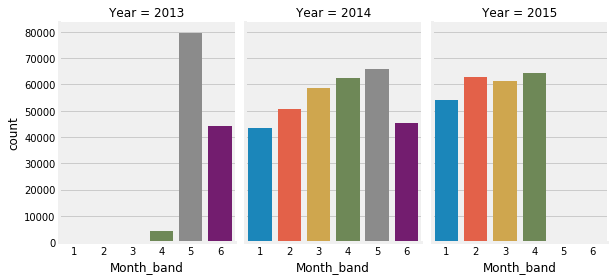

In [106]:
# count of trips by month band by year
sns.catplot(x="Month_band",col="Year",
                data=tripdatanosubtype, kind="count",
                height=4, aspect=.7)



In [107]:
tripdatanosubtype['HourBand']=0
tripdatanosubtype.loc[tripdatanosubtype['Hour']<=3,'EndMonth_band']=1
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>3)&(tripdatanosubtype['Hour']<=6),'Hourband']=2
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>6)&(tripdatanosubtype['Hour']<=9),'Hourband']=3
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>9)&(tripdatanosubtype['Hour']<=12),'Hourband']=4
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>12)&(tripdatanosubtype['Hour']<=15),'Hourband']=5
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>15)&(tripdatanosubtype['Hour']<=18),'Hourband']=6
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>18)&(tripdatanosubtype['Hour']<=21),'Hourband']=7
tripdatanosubtype.loc[(tripdatanosubtype['Hour']>21)&(tripdatanosubtype['Hour']<=24),'Hourband']=8
tripdatanosubtype.head(2)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,Weekday,EndYear,EndMonth,EndDay,EndHour,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,3,2013,8,29,14,3,4,4,0,5.0
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,3,2013,8,29,14,3,4,4,0,5.0


In [108]:
tripsbyhour = tripdatanosubtype.groupby(['Year','Month_band','Hourband'])['Trip ID'].count().reset_index()
tripsbyhour

,Year,Month_band,Hourband,Trip ID
0,2013,4,2.0,22
1,2013,4,3.0,254
2,2013,4,4.0,1032
3,2013,4,5.0,1142
4,2013,4,6.0,1110
...,...,...,...,...
86,2015,4,4.0,8042
87,2015,4,5.0,7819
88,2015,4,6.0,19929
89,2015,4,7.0,5189


In [109]:

tripsbyhour.groupby(['Year','Hourband'])['Trip ID'].mean().reset_index()


,Year,Hourband,Trip ID
0,2013,2.0,1000.666667
1,2013,3.0,9339.666667
2,2013,4.0,7613.333333
3,2013,5.0,8006.666667
4,2013,6.0,11403.333333
5,2013,7.0,3886.333333
6,2013,8.0,959.000000
7,2014,2.0,1493.500000
8,2014,3.0,15593.333333
9,2014,4.0,7608.500000


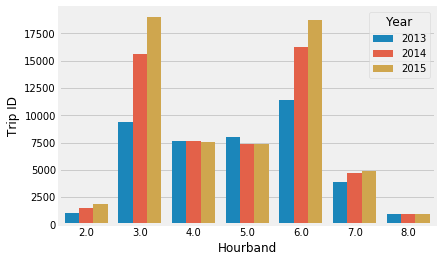

In [110]:
#average number of trips for each hour band by year
sns.barplot(x="Hourband", y="Trip ID", hue="Year", data=tripsbyhour,ci=None)

In [111]:
tripsbyweekday = tripdatanosubtype.groupby(['Year','Month_band','Weekday'])['Trip ID'].count().reset_index()
tripsbyweekday

,Year,Month_band,Weekday,Trip ID
0,2013,4,3,1496
1,2013,4,4,1428
2,2013,4,5,1280
3,2013,5,0,12736
4,2013,5,1,12571
...,...,...,...,...
82,2015,4,2,12271
83,2015,4,3,11804
84,2015,4,4,10240
85,2015,4,5,3747


In [112]:
tripsbyweekday.groupby(['Year','Weekday'])['Trip ID'].mean().reset_index()

,Year,Weekday,Trip ID
0,2013,0,10382.000000
1,2013,1,10124.000000
2,2013,2,9890.500000
3,2013,3,7201.666667
4,2013,4,7153.333333
5,2013,5,4234.333333
6,2013,6,5673.500000
7,2014,0,9467.166667
8,2014,1,10071.000000
9,2014,2,9905.666667


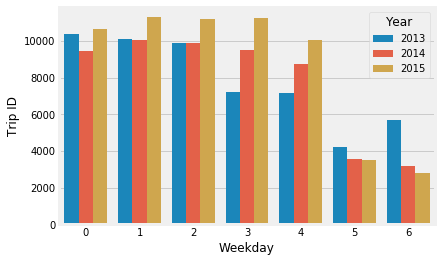

In [113]:
#average number of trips for each weekday by year
sns.barplot(x="Weekday", y="Trip ID", hue="Year", data=tripsbyweekday,ci=None)

Question 2 - What were the most popular destinations to start from 

In [114]:
tripsbystart= tripdatanosubtype.groupby(['Year','Month_band','Start Station'])['Trip ID'].count().reset_index()


In [115]:
tripsbystart.describe()

,Year,Month_band,Trip ID
count,891.000000,891.000000,891.000000
mean,2014.098765,3.511785,782.608305
std,0.721506,1.645090,893.760151
min,2013.000000,1.000000,2.000000
25%,2014.000000,2.000000,111.000000
50%,2014.000000,4.000000,349.000000
75%,2015.000000,5.000000,1217.000000
max,2015.000000,6.000000,4999.000000


In [116]:
tripsbystartmean = tripsbystart.groupby(['Year','Start Station'])['Trip ID'].mean().reset_index()
tripsbystartmean

,Year,Start Station,Trip ID
0,2013,2nd at Folsom,1062.000000
1,2013,2nd at South Park,1246.333333
2,2013,2nd at Townsend,1471.333333
3,2013,5th at Howard,813.000000
4,2013,Adobe on Almaden,96.666667
...,...,...,...
203,2015,Temporary Transbay Terminal (Howard at Beale),2498.000000
204,2015,Townsend at 7th,2422.750000
205,2015,University and Emerson,97.750000
206,2015,Washington at Kearny,463.000000


In [117]:
tripsbystartmean['rankbystation'] = tripsbystartmean.groupby(['Year'])['Trip ID'].rank(ascending=False)

In [118]:
tripbystartmean = tripsbystartmean[tripsbystartmean['rankbystation']< 5]

In [119]:
tripbystartmean

,Year,Start Station,Trip ID,rankbystation
16,2013,Embarcadero at Sansome,2122.333333,3.0
22,2013,Harry Bridges Plaza (Ferry Building),2270.666667,2.0
28,2013,Market at Sansome,1712.000000,4.0
45,2013,San Francisco Caltrain (Townsend at 4th),2613.666667,1.0
66,2014,2nd at Townsend,2155.833333,4.0
88,2014,Harry Bridges Plaza (Ferry Building),2589.333333,2.0
115,2014,San Francisco Caltrain (Townsend at 4th),4190.666667,1.0
116,2014,San Francisco Caltrain 2 (330 Townsend),2522.000000,3.0
155,2015,Embarcadero at Sansome,2512.000000,4.0
161,2015,Harry Bridges Plaza (Ferry Building),3050.250000,3.0


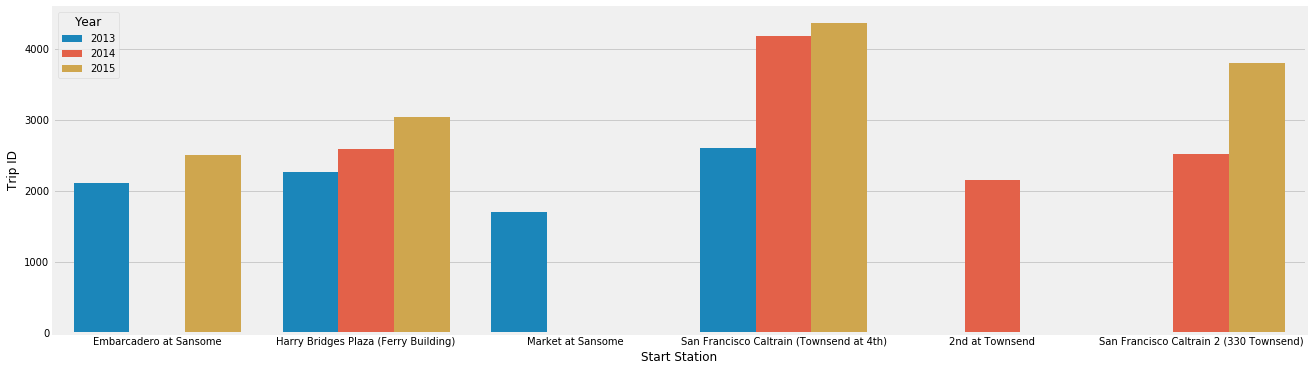

In [120]:
#average number of trips for each of the top stations by year
plt.figure(figsize=(20,6))
sns.barplot(x="Start Station", y="Trip ID", hue="Year", data=tripbystartmean,ci=None)

Question 3 - What were the most popular end destinations by year

In [121]:
tripsbyend = tripdatanosubtype.groupby(['Year','Month_band','End Station'])['Trip ID'].count().reset_index()

In [122]:
tripsbyend = tripsbyend.groupby(['Year','End Station'])['Trip ID'].mean().reset_index()
tripsbyend

,Year,End Station,Trip ID
0,2013,2nd at Folsom,729.666667
1,2013,2nd at South Park,1285.666667
2,2013,2nd at Townsend,1649.000000
3,2013,5th at Howard,932.000000
4,2013,Adobe on Almaden,90.666667
...,...,...,...
205,2015,Temporary Transbay Terminal (Howard at Beale),2176.750000
206,2015,Townsend at 7th,2718.750000
207,2015,University and Emerson,119.500000
208,2015,Washington at Kearny,601.250000


In [123]:
tripsbyend['rankbystation'] = tripsbyend.groupby(['Year'])['Trip ID'].rank(ascending=False)

In [124]:
tripsbyend = tripsbyend[tripsbyend['rankbystation']< 5]

In [125]:
tripsbyend

,Year,End Station,Trip ID,rankbystation
16,2013,Embarcadero at Sansome,2479.000000,2.0
22,2013,Harry Bridges Plaza (Ferry Building),2282.666667,3.0
28,2013,Market at Sansome,1718.000000,4.0
46,2013,San Francisco Caltrain (Townsend at 4th),2965.666667,1.0
90,2014,Harry Bridges Plaza (Ferry Building),2615.333333,2.0
96,2014,Market at Sansome,2469.333333,4.0
117,2014,San Francisco Caltrain (Townsend at 4th),5535.500000,1.0
118,2014,San Francisco Caltrain 2 (330 Townsend),2555.500000,3.0
157,2015,Embarcadero at Sansome,2935.250000,4.0
163,2015,Harry Bridges Plaza (Ferry Building),3064.250000,3.0


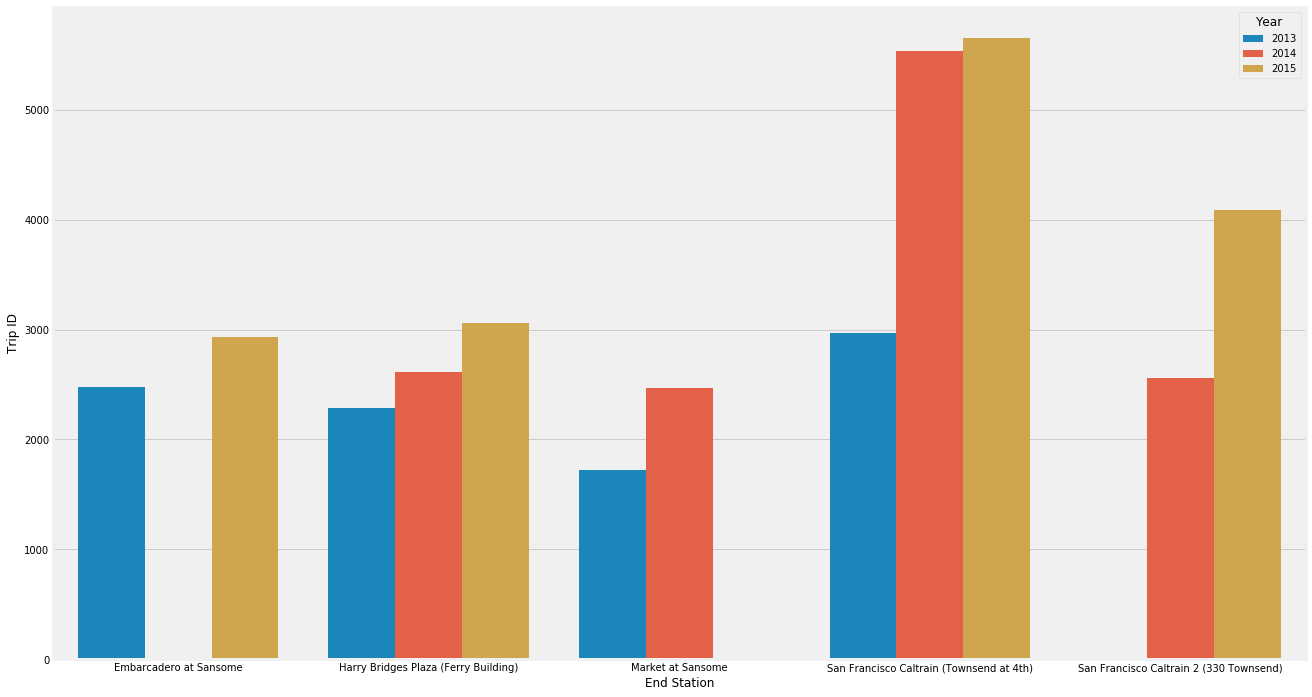

In [126]:
#average number of trips for each of the top end destinations by year
plt.figure(figsize=(20,12))
sns.barplot(x="End Station", y="Trip ID", hue="Year", data=tripsbyend,ci=None)

In [127]:
tripdatanosubtype.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,Weekday,EndYear,EndMonth,EndDay,EndHour,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,3,2013,8,29,14,3,4,4,0,5.0
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,3,2013,8,29,14,3,4,4,0,5.0
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,97214,...,3,2013,8,29,10,3,4,4,0,4.0
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,95060,...,3,2013,8,29,11,3,4,4,0,4.0
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,94103,...,3,2013,8,29,12,3,4,4,0,4.0


In [128]:
tripdatanosubtype['route']= tripdatanosubtype['Start Station'].astype(str) + " - " + tripdatanosubtype['End Station']


In [129]:
tripdatanosubtype.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,EndYear,EndMonth,EndDay,EndHour,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband,route
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,2013,8,29,14,3,4,4,0,5.0,South Van Ness at Market - South Van Ness at M...
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,2013,8,29,14,3,4,4,0,5.0,San Jose City Hall - San Jose City Hall
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,97214,...,2013,8,29,10,3,4,4,0,4.0,Mountain View City Hall - Mountain View City Hall
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,95060,...,2013,8,29,11,3,4,4,0,4.0,San Jose City Hall - San Jose City Hall
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,94103,...,2013,8,29,12,3,4,4,0,4.0,South Van Ness at Market - Market at 10th


In [130]:
tripsbyroute = tripdatanosubtype.groupby(['Year','Month_band','route'])['Trip ID'].count().reset_index()

In [131]:
tripsbyroute = tripsbyroute.groupby(['Year','route'])['Trip ID'].mean().reset_index()
tripsbyroute

,Year,route,Trip ID
0,2013,2nd at Folsom - 2nd at Folsom,29.333333
1,2013,2nd at Folsom - 2nd at South Park,60.000000
2,2013,2nd at Folsom - 2nd at Townsend,71.000000
3,2013,2nd at Folsom - 5th at Howard,40.500000
4,2013,2nd at Folsom - Beale at Market,20.000000
...,...,...,...
5023,2015,Yerba Buena Center of the Arts (3rd @ Howard) ...,28.750000
5024,2015,Yerba Buena Center of the Arts (3rd @ Howard) ...,15.750000
5025,2015,Yerba Buena Center of the Arts (3rd @ Howard) ...,49.250000
5026,2015,Yerba Buena Center of the Arts (3rd @ Howard) ...,12.000000


In [132]:
tripsbyroute['rankbyroute'] = tripsbyroute.groupby(['Year'])['Trip ID'].rank(ascending=False)

In [133]:
tripsbyroute = tripsbyroute[tripsbyroute['rankbyroute']< 5]

In [134]:
tripsbyroute

,Year,route,Trip ID,rankbyroute
587,2013,Harry Bridges Plaza (Ferry Building) - Embarca...,425.333333,1.0
742,2013,Market at Sansome - 2nd at South Park,235.333333,4.0
1098,2013,San Francisco Caltrain 2 (330 Townsend) - Town...,285.000000,3.0
1400,2013,Townsend at 7th - San Francisco Caltrain (Town...,323.666667,2.0
1578,2014,2nd at Townsend - Harry Bridges Plaza (Ferry B...,388.333333,4.0
2182,2014,Harry Bridges Plaza (Ferry Building) - Embarca...,471.000000,3.0
2843,2014,San Francisco Caltrain 2 (330 Townsend) - Town...,489.500000,2.0
3218,2014,Townsend at 7th - San Francisco Caltrain (Town...,526.333333,1.0
3437,2015,2nd at Townsend - Harry Bridges Plaza (Ferry B...,512.750000,4.0
4005,2015,Harry Bridges Plaza (Ferry Building) - Embarca...,598.250000,2.0


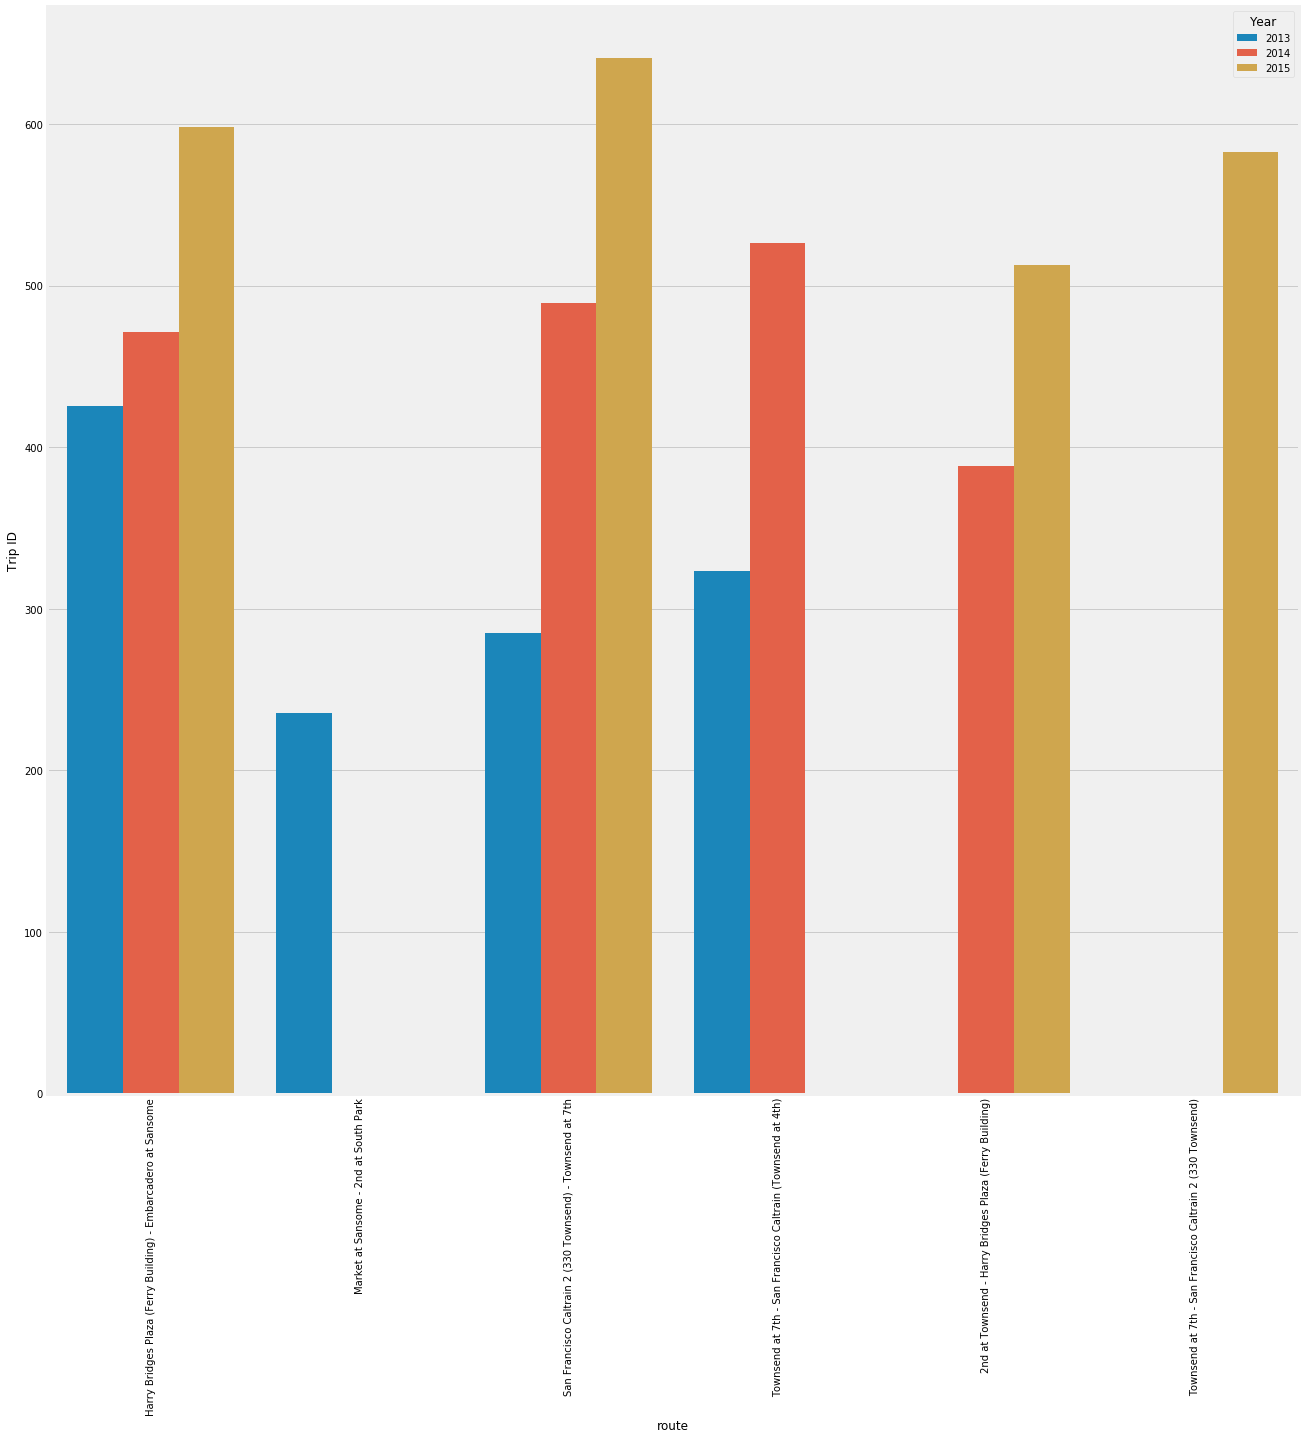

In [135]:
#average number of trips for each of the top routes  by year
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(x="route", y="Trip ID", hue="Year", data=tripsbyroute,ci=None)

Question 4 - What are the most popular zip codes by year

In [136]:
tripsbyzip = tripdatanosubtype.groupby(['Year','Zip Code'])['Trip ID'].count().reset_index()

In [137]:
tripsbyzip

,Year,Zip Code,Trip ID
0,2013,10000,1
1,2013,10001,22
2,2013,10002,6
3,2013,10003,50
4,2013,10005,1
...,...,...,...
11039,2015,99958,2
11040,2015,9999,1
11041,2015,99999,14
11042,2015,Missing,172


In [138]:
tripsbyzip['rankbyzip'] = tripsbyzip.groupby(['Year'])['Trip ID'].rank(ascending=False)

In [139]:
tripsbyzip = tripsbyzip[tripsbyzip['rankbyzip']< 5]

In [140]:
tripsbyzip

,Year,Zip Code,Trip ID,rankbyzip
1947,2013,94105,10649,2.0
1949,2013,94107,13649,1.0
1974,2013,94133,5834,4.0
2438,2013,Missing,7006,3.0
6572,2014,94103,13043,4.0
6575,2014,94105,19899,2.0
6577,2014,94107,36061,1.0
6609,2014,94133,15687,3.0
10421,2015,94103,10074,4.0
10425,2015,94105,14259,2.0


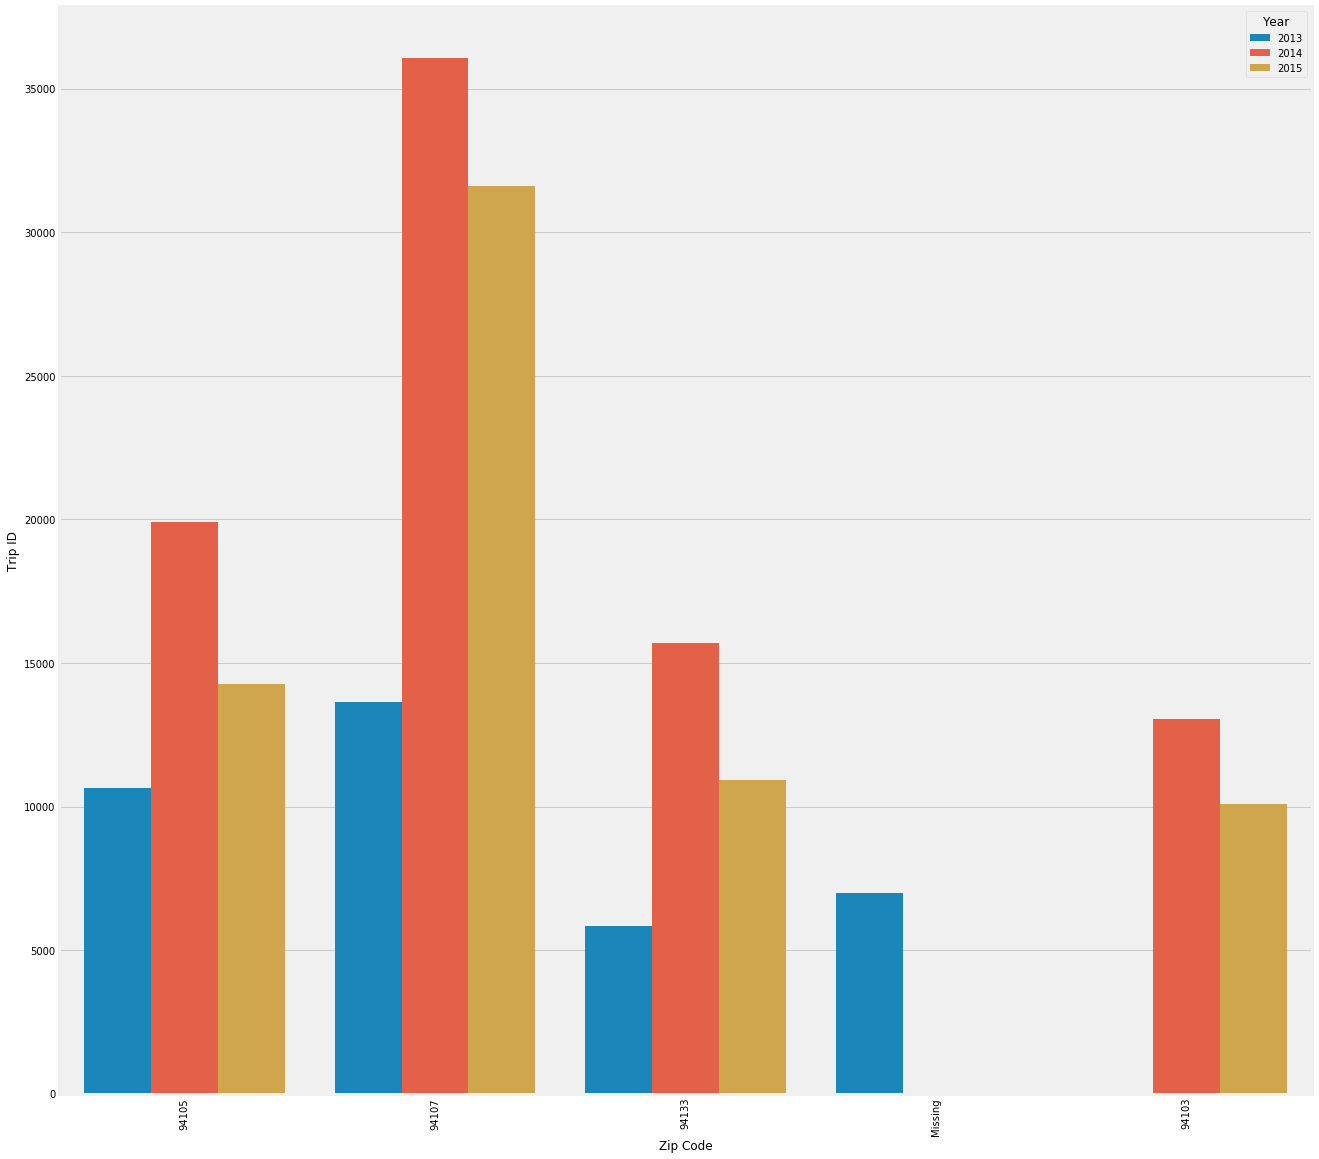

In [141]:
# average number of trips for the top zip codes 
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.barplot(x="Zip Code",y="Trip ID",hue="Year", data=tripsbyzip,ci=None)

Question 5 - What is the distribution of trips by duration

In [142]:
from datetime import datetime
import time
import datetime as DT

In [143]:
tripdatanosubtype['durations'] = tripdatanosubtype['End Date'] - tripdatanosubtype['Start Date']

In [144]:
tripdatanosubtype

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,EndMonth,EndDay,EndHour,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband,route,durations
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,8,29,14,3,4,4,0,5.0,South Van Ness at Market - South Van Ness at M...,00:01:00
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,8,29,14,3,4,4,0,5.0,San Jose City Hall - San Jose City Hall,00:01:00
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,97214,...,8,29,10,3,4,4,0,4.0,Mountain View City Hall - Mountain View City Hall,00:01:00
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,95060,...,8,29,11,3,4,4,0,4.0,San Jose City Hall - San Jose City Hall,00:01:00
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,94103,...,8,29,12,3,4,4,0,4.0,South Van Ness at Market - Market at 10th,00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,94118,...,9,1,4,0,5,5,0,2.0,Powell Street BART - Townsend at 7th,00:11:00
354148,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,44100,...,9,1,5,0,5,1,0,NaN,Harry Bridges Plaza (Ferry Building) - San Fra...,01:52:00
354149,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,32,...,9,1,0,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,00:09:00
354150,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,32,...,9,1,0,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,00:10:00


In [145]:
import datetime
tripdatanosubtype['durations'] = tripdatanosubtype['durations'] / np.timedelta64(1, 'm')

In [146]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [147]:
# find limits for durations
du_upper_limit, du_lower_limit = find_skewed_boundaries(tripdatanosubtype, 'durations', 100)
du_upper_limit, du_lower_limit

(713.0, -694.0)

In [148]:
outliers_du = np.where(tripdatanosubtype['durations'] > du_upper_limit, True,
                       np.where(tripdatanosubtype['durations'] < du_lower_limit, True, False))

In [149]:
tripdatatrimmed = tripdatanosubtype.loc[~(outliers_du), ]

tripdatanosubtype.shape, tripdatatrimmed.shape

((697304, 27), (696023, 27))

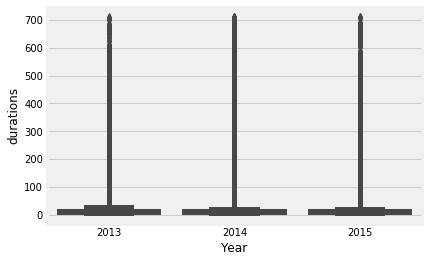

In [150]:
sns.boxplot(x='Year', y='durations',data= tripdatatrimmed ,palette='rainbow')

In [151]:
tripdatanosubtype['durationband']=0
tripdatanosubtype.loc[tripdatanosubtype['durations']<=60,'durationband']=1
tripdatanosubtype.loc[(tripdatanosubtype['durations']>60)&(tripdatanosubtype['durations']<=120),'durationband']=2
tripdatanosubtype.loc[(tripdatanosubtype['durations']>120)&(tripdatanosubtype['durations']<=180),'durationband']=3
tripdatanosubtype.loc[(tripdatanosubtype['durations']>180)&(tripdatanosubtype['durations']<=240),'durationband']=4
tripdatanosubtype.loc[(tripdatanosubtype['durations']>240)&(tripdatanosubtype['durations']<=300),'durationband']=5
tripdatanosubtype.loc[(tripdatanosubtype['durations']>300)&(tripdatanosubtype['durations']<=360),'durationband']=6
tripdatanosubtype.loc[(tripdatanosubtype['durations']>360)&(tripdatanosubtype['durations']<=420),'durationband']=7
tripdatanosubtype.loc[(tripdatanosubtype['durations']>420)&(tripdatanosubtype['durations']<=480),'durationband']=8
tripdatanosubtype.loc[(tripdatanosubtype['durations']>480),'durationband']=9
tripdatanosubtype.head(2)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,EndDay,EndHour,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband,route,durations,durationband
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,29,14,3,4,4,0,5.0,South Van Ness at Market - South Van Ness at M...,1.0,1
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,29,14,3,4,4,0,5.0,San Jose City Hall - San Jose City Hall,1.0,1


In [152]:
tripduration = tripdatanosubtype['durationband'].value_counts(normalize=True).reset_index()

In [153]:
tripduration

,index,durationband
0,1,0.967260
1,2,0.013353
2,3,0.006514
3,4,0.003872
4,9,0.002897
5,5,0.002636
6,6,0.001622
7,7,0.001114
8,8,0.000733


In [154]:
tripduration = tripduration.rename(columns={"index": "Hour", "durationband": "percenttotal"})

In [155]:
tripduration

,Hour,percenttotal
0,1,0.967260
1,2,0.013353
2,3,0.006514
3,4,0.003872
4,9,0.002897
5,5,0.002636
6,6,0.001622
7,7,0.001114
8,8,0.000733


Question 6 - How have the average number of trips per day changed over the years


In [156]:

from datetime import datetime
from datetime import datetime

In [157]:
tripdatanosubtype['Start Dates'] = tripdatanosubtype['Start Date'].map(lambda x: x.strftime('%m/%d/%Y') if pd.notnull(x) else '')
 


In [158]:
tripdatanosubtype

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,EndHour,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband,route,durations,durationband,Start Dates
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,14,3,4,4,0,5.0,South Van Ness at Market - South Van Ness at M...,1.0,1,08/29/2013
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,14,3,4,4,0,5.0,San Jose City Hall - San Jose City Hall,1.0,1,08/29/2013
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,97214,...,10,3,4,4,0,4.0,Mountain View City Hall - Mountain View City Hall,1.0,1,08/29/2013
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,95060,...,11,3,4,4,0,4.0,San Jose City Hall - San Jose City Hall,1.0,1,08/29/2013
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,94103,...,12,3,4,4,0,4.0,South Van Ness at Market - Market at 10th,2.0,1,08/29/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,94118,...,4,0,5,5,0,2.0,Powell Street BART - Townsend at 7th,11.0,1,09/01/2014
354148,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,44100,...,5,0,5,1,0,NaN,Harry Bridges Plaza (Ferry Building) - San Fra...,112.0,2,09/01/2014
354149,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,32,...,0,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,9.0,1,09/01/2014
354150,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,32,...,0,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,10.0,1,09/01/2014


In [159]:
tripsbyday = tripdatanosubtype.groupby(['Year','Start Dates'])['Trip ID'].count().reset_index()
tripsbyday

,Year,Start Dates,Trip ID
0,2013,08/29/2013,1496
1,2013,08/30/2013,1428
2,2013,08/31/2013,1280
3,2013,09/01/2013,1412
4,2013,09/02/2013,1322
...,...,...,...
728,2015,08/27/2015,1443
729,2015,08/28/2015,1220
730,2015,08/29/2015,342
731,2015,08/30/2015,331


In [160]:
tripsbyday= tripsbyday.groupby(['Year'])['Trip ID'].mean().reset_index()
tripsbyday

,Year,Trip ID
0,2013,1023.264000
1,2014,894.079452
2,2015,1000.234568


Question 7 - How have the average number of trips per day changed over the years

In [161]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [162]:
tripdatanosubtype['Start Dates'] = tripdatanosubtype['Start Date'].map(lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else '')
 

In [163]:
tripdatanosubtype['Start Dates'] = pd.to_datetime(tripdatanosubtype['Start Dates'])

In [164]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2013-01-01', end='2015-12-31').to_pydatetime()


In [165]:
holidays = pd.to_datetime(holidays).to_frame(index = False) 


In [166]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       30 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 368.0 bytes


In [167]:
holidays['holiday'] = 'y'

In [168]:
holidays.columns = ['Start Dates', 'holiday']

In [169]:
holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Start Dates  30 non-null     datetime64[ns]
 1   holiday      30 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 608.0+ bytes


In [170]:
holidays

,Start Dates,holiday
0,2013-01-01,y
1,2013-01-21,y
2,2013-02-18,y
3,2013-05-27,y
4,2013-07-04,y
5,2013-09-02,y
6,2013-10-14,y
7,2013-11-11,y
8,2013-11-28,y
9,2013-12-25,y


In [171]:
tripdatanosubtype = tripdatanosubtype.merge(holidays, on='Start Dates', how='left')


In [172]:
tripdatanosubtype['holiday'].fillna("n", inplace=True)


In [173]:
tripdatanosubtype

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband,route,durations,durationband,Start Dates,holiday
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,94127,...,3,4,4,0,5.0,South Van Ness at Market - South Van Ness at M...,1.0,1,2013-08-29,n
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,95138,...,3,4,4,0,5.0,San Jose City Hall - San Jose City Hall,1.0,1,2013-08-29,n
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,97214,...,3,4,4,0,4.0,Mountain View City Hall - Mountain View City Hall,1.0,1,2013-08-29,n
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,95060,...,3,4,4,0,4.0,San Jose City Hall - San Jose City Hall,1.0,1,2013-08-29,n
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,94103,...,3,4,4,0,4.0,South Van Ness at Market - Market at 10th,2.0,1,2013-08-29,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697299,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,94118,...,0,5,5,0,2.0,Powell Street BART - Townsend at 7th,11.0,1,2014-09-01,y
697300,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,44100,...,0,5,1,0,NaN,Harry Bridges Plaza (Ferry Building) - San Fra...,112.0,2,2014-09-01,y
697301,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,32,...,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,9.0,1,2014-09-01,y
697302,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,32,...,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,10.0,1,2014-09-01,y


In [174]:
tripsbyholiday = tripdatanosubtype[tripdatanosubtype['holiday']== 'y']
tripsbyholiday

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Zip Code,...,EndWeekday,Month_band,EndMonth_band,HourBand,Hourband,route,durations,durationband,Start Dates,holiday
2808,8466,755,2013-09-02 00:05:00,Commercial at Montgomery,45,2013-09-02 00:18:00,Powell at Post (Union Square),71,267,94109,...,0,5,1,0,NaN,Commercial at Montgomery - Powell at Post (Uni...,13.0,1,2013-09-02,y
2809,8467,696,2013-09-02 00:07:00,Mechanics Plaza (Market at Battery),75,2013-09-02 00:18:00,Harry Bridges Plaza (Ferry Building),50,387,94704,...,0,5,1,0,NaN,Mechanics Plaza (Market at Battery) - Harry Br...,11.0,1,2013-09-02,y
2810,8468,657,2013-09-02 00:07:00,Mechanics Plaza (Market at Battery),75,2013-09-02 00:18:00,Harry Bridges Plaza (Ferry Building),50,549,94704,...,0,5,1,0,NaN,Mechanics Plaza (Market at Battery) - Harry Br...,11.0,1,2013-09-02,y
2811,8469,924,2013-09-02 00:07:00,Embarcadero at Folsom,51,2013-09-02 00:23:00,Embarcadero at Sansome,60,313,94105,...,0,5,1,0,NaN,Embarcadero at Folsom - Embarcadero at Sansome,16.0,1,2013-09-02,y
2812,8470,6336,2013-09-02 00:13:00,2nd at Townsend,61,2013-09-02 01:58:00,2nd at Townsend,61,374,94403,...,0,5,1,0,NaN,2nd at Townsend - 2nd at Townsend,105.0,2,2013-09-02,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697299,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,94118,...,0,5,5,0,2.0,Powell Street BART - Townsend at 7th,11.0,1,2014-09-01,y
697300,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,44100,...,0,5,1,0,NaN,Harry Bridges Plaza (Ferry Building) - San Fra...,112.0,2,2014-09-01,y
697301,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,32,...,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,9.0,1,2014-09-01,y
697302,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,32,...,0,5,1,0,NaN,South Van Ness at Market - 5th at Howard,10.0,1,2014-09-01,y


In [175]:
tripsbyholiday = tripsbyholiday.groupby(['Year','Start Dates'])['Trip ID'].count().reset_index()
tripsbyholiday

,Year,Start Dates,Trip ID
0,2013,2013-09-02,1322
1,2013,2013-10-14,1050
2,2013,2013-11-11,986
3,2013,2013-11-28,272
4,2013,2013-12-25,360
5,2014,2014-01-01,359
6,2014,2014-01-20,615
7,2014,2014-02-17,464
8,2014,2014-05-26,450
9,2014,2014-07-04,391


In [176]:
tripsbyholiday = tripsbyholiday.groupby(['Year'])['Trip ID'].mean().reset_index()
tripsbyholiday

,Year,Trip ID
0,2013,798.0
1,2014,540.4
2,2015,421.2


In [177]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 0 to 1824
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         920 non-null    object 
 1   Max_Temperature_F            920 non-null    float64
 2   Mean_Temperature_F           920 non-null    float64
 3   Min_TemperatureF             920 non-null    float64
 4   Max_Dew_Point_F              920 non-null    float64
 5   MeanDew_Point_F              920 non-null    float64
 6   Min_Dewpoint_F               920 non-null    float64
 7   Max_Humidity                 920 non-null    float64
 8   Mean_Humidity                920 non-null    float64
 9   Min_Humidity                 920 non-null    float64
 10  Max_Sea_Level_Pressure_In    920 non-null    float64
 11  Mean_Sea_Level_Pressure_In   920 non-null    float64
 12  Min_Sea_Level_Pressure_In    920 non-null    float64
 13  Max_Visibility_Mil

In [178]:
tripdatanosubtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697304 entries, 0 to 697303
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Trip ID          697304 non-null  int64         
 1   Duration         697304 non-null  int64         
 2   Start Date       697304 non-null  datetime64[ns]
 3   Start Station    697304 non-null  object        
 4   Start Terminal   697304 non-null  int64         
 5   End Date         697304 non-null  datetime64[ns]
 6   End Station      697304 non-null  object        
 7   End Terminal     697304 non-null  int64         
 8   Bike #           697304 non-null  int64         
 9   Zip Code         697304 non-null  object        
 10  Subscriber Type  697304 non-null  object        
 11  Year             697304 non-null  int64         
 12  Month            697304 non-null  int64         
 13  Day              697304 non-null  int64         
 14  Hour             697

In [179]:
J201402weatherdata = pd.read_csv('201402_weather_data.csv')
J201408weatherdata = pd.read_csv('201408_weather_data.csv')
J201508weatherdata = pd.read_csv('201508_weather_data.csv')

In [180]:
J201402weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         920 non-null    object 
 1   Max_Temperature_F            920 non-null    int64  
 2   Mean_Temperature_F           920 non-null    int64  
 3   Min_TemperatureF             920 non-null    int64  
 4   Max_Dew_Point_F              920 non-null    int64  
 5   MeanDew_Point_F              920 non-null    int64  
 6   Min_Dewpoint_F               920 non-null    int64  
 7   Max_Humidity                 920 non-null    int64  
 8   Mean_Humidity                920 non-null    int64  
 9   Min_Humidity                 920 non-null    int64  
 10  Max_Sea_Level_Pressure_In    920 non-null    float64
 11  Mean_Sea_Level_Pressure_In   920 non-null    float64
 12  Min_Sea_Level_Pressure_In    920 non-null    float64
 13  Max_Visibility_Miles

In [181]:
J201408weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PDT                         920 non-null    object 
 1   Max TemperatureF            920 non-null    int64  
 2   Mean TemperatureF           920 non-null    int64  
 3   Min TemperatureF            920 non-null    int64  
 4   Max Dew PointF              916 non-null    float64
 5   MeanDew PointF              916 non-null    float64
 6   Min DewpointF               916 non-null    float64
 7   Max Humidity                916 non-null    float64
 8    Mean Humidity              916 non-null    float64
 9    Min Humidity               916 non-null    float64
 10   Max Sea Level PressureIn   920 non-null    float64
 11   Mean Sea Level PressureIn  920 non-null    float64
 12   Min Sea Level PressureIn   920 non-null    float64
 13   Max VisibilityMiles        912 non

In [182]:
J201508weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PDT                         1825 non-null   object 
 1   Max TemperatureF            1821 non-null   float64
 2   Mean TemperatureF           1821 non-null   float64
 3   Min TemperatureF            1821 non-null   float64
 4   Max Dew PointF              1775 non-null   float64
 5   MeanDew PointF              1775 non-null   float64
 6   Min DewpointF               1775 non-null   float64
 7   Max Humidity                1775 non-null   float64
 8    Mean Humidity              1775 non-null   float64
 9    Min Humidity               1775 non-null   float64
 10   Max Sea Level PressureIn   1824 non-null   float64
 11   Mean Sea Level PressureIn  1824 non-null   float64
 12   Min Sea Level PressureIn   1824 non-null   float64
 13   Max VisibilityMiles        1820 

In [183]:
J201408weatherdata.columns

Index(['PDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees', 'Zip'],
      dtype='object')

In [184]:
J201402weatherdata.columns=['PDT', 'Max TemperatureF', 'MeanTemperatureF', 'MinTemperatureF',
       'MaxDewPointF', 'MeanDewPointF', 'MinDewpointF', 'MaxHumidity',
       'MeanHumidity', 'MinHumidity', 'MaxSeaLevelPressureIn',
       'MeanSeaLevelPressureIn', 'MinSeaLevelPressureIn',
       'MaxVisibilityMiles', 'MeanVisibilityMiles', 'MinVisibilityMiles',
       'MaxWindSpeedMPH', 'MeanWindSpeedMPH', 'MaxGustSpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees', 'Zip']

In [185]:
J201408weatherdata.columns=['PDT', 'Max TemperatureF', 'MeanTemperatureF', 'MinTemperatureF',
       'MaxDewPointF', 'MeanDewPointF', 'MinDewpointF', 'MaxHumidity',
       'MeanHumidity', 'MinHumidity', 'MaxSeaLevelPressureIn',
       'MeanSeaLevelPressureIn', 'MinSeaLevelPressureIn',
       'MaxVisibilityMiles', 'MeanVisibilityMiles', 'MinVisibilityMiles',
       'MaxWindSpeedMPH', 'MeanWindSpeedMPH', 'MaxGustSpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees', 'Zip']

In [186]:
J201508weatherdata.columns=['PDT', 'Max TemperatureF', 'MeanTemperatureF', 'MinTemperatureF',
       'MaxDewPointF', 'MeanDewPointF', 'MinDewpointF', 'MaxHumidity',
       'MeanHumidity', 'MinHumidity', 'MaxSeaLevelPressureIn',
       'MeanSeaLevelPressureIn', 'MinSeaLevelPressureIn',
       'MaxVisibilityMiles', 'MeanVisibilityMiles', 'MinVisibilityMiles',
       'MaxWindSpeedMPH', 'MeanWindSpeedMPH', 'MaxGustSpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees', 'Zip']

In [187]:
frames = [J201402weatherdata,J201408weatherdata,J201508weatherdata]
weather = pd.concat(frames)

In [188]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 0 to 1824
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PDT                     3665 non-null   object 
 1   Max TemperatureF        3661 non-null   float64
 2   MeanTemperatureF        3661 non-null   float64
 3   MinTemperatureF         3661 non-null   float64
 4   MaxDewPointF            3611 non-null   float64
 5   MeanDewPointF           3611 non-null   float64
 6   MinDewpointF            3611 non-null   float64
 7   MaxHumidity             3611 non-null   float64
 8   MeanHumidity            3611 non-null   float64
 9   MinHumidity             3611 non-null   float64
 10  MaxSeaLevelPressureIn   3664 non-null   float64
 11  MeanSeaLevelPressureIn  3664 non-null   float64
 12  MinSeaLevelPressureIn   3664 non-null   float64
 13  MaxVisibilityMiles      3652 non-null   float64
 14  MeanVisibilityMiles     3652 non-null   

In [189]:
weather= weather.drop(['Events','MaxGustSpeedMPH'], axis=1)


In [190]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 0 to 1824
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PDT                     3665 non-null   object 
 1   Max TemperatureF        3661 non-null   float64
 2   MeanTemperatureF        3661 non-null   float64
 3   MinTemperatureF         3661 non-null   float64
 4   MaxDewPointF            3611 non-null   float64
 5   MeanDewPointF           3611 non-null   float64
 6   MinDewpointF            3611 non-null   float64
 7   MaxHumidity             3611 non-null   float64
 8   MeanHumidity            3611 non-null   float64
 9   MinHumidity             3611 non-null   float64
 10  MaxSeaLevelPressureIn   3664 non-null   float64
 11  MeanSeaLevelPressureIn  3664 non-null   float64
 12  MinSeaLevelPressureIn   3664 non-null   float64
 13  MaxVisibilityMiles      3652 non-null   float64
 14  MeanVisibilityMiles     3652 non-null   

In [191]:
weather.head()

,PDT,Max TemperatureF,MeanTemperatureF,MinTemperatureF,MaxDewPointF,MeanDewPointF,MinDewpointF,MaxHumidity,MeanHumidity,MinHumidity,...,MinSeaLevelPressureIn,MaxVisibilityMiles,MeanVisibilityMiles,MinVisibilityMiles,MaxWindSpeedMPH,MeanWindSpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,29.97,10.0,10.0,10.0,23.0,11.0,0,4.0,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,29.93,10.0,10.0,7.0,29.0,13.0,0,2.0,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,29.92,10.0,10.0,10.0,26.0,15.0,0,4.0,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,29.91,10.0,10.0,10.0,25.0,13.0,0,4.0,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,29.90,10.0,10.0,6.0,23.0,12.0,0,6.0,277.0,94107


In [192]:
weather['PDT']= pd.to_datetime(weather['PDT'])


In [193]:
weather['PDT'] = weather['PDT'].map(lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else '')

In [194]:
weather['PDT']= pd.to_datetime(weather['PDT'])


In [195]:
tripdatanosubtype['Zip Code']=tripdatanosubtype['Zip Code'].replace(['Missing'],0)

In [196]:
tripdatanosubtype['Zip Codes'] = tripdatanosubtype['Zip Code'].str.isdigit() 

In [197]:
tripdatanosubtype = tripdatanosubtype[tripdatanosubtype['Zip Codes']==True]

In [198]:
tripdatanosubtype['Zip Code']= pd.to_numeric(tripdatanosubtype['Zip Code'])

In [199]:
tripdatanosubtype['ZipMatch']= tripdatanosubtype['Zip Code'].isin(weather['Zip'])

In [200]:
tripdatanosubtype['ZipMatch'].value_counts()

False    579081
True      98489
Name: ZipMatch, dtype: int64

In [201]:
weather.head(10)

,PDT,Max TemperatureF,MeanTemperatureF,MinTemperatureF,MaxDewPointF,MeanDewPointF,MinDewpointF,MaxHumidity,MeanHumidity,MinHumidity,...,MinSeaLevelPressureIn,MaxVisibilityMiles,MeanVisibilityMiles,MinVisibilityMiles,MaxWindSpeedMPH,MeanWindSpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,29.97,10.0,10.0,10.0,23.0,11.0,0,4.0,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,29.93,10.0,10.0,7.0,29.0,13.0,0,2.0,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,29.92,10.0,10.0,10.0,26.0,15.0,0,4.0,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,29.91,10.0,10.0,10.0,25.0,13.0,0,4.0,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,29.90,10.0,10.0,6.0,23.0,12.0,0,6.0,277.0,94107
5,2013-09-03,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,29.95,10.0,10.0,10.0,24.0,15.0,0,2.0,276.0,94107
6,2013-09-04,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,29.97,10.0,10.0,10.0,29.0,19.0,0,4.0,269.0,94107
7,2013-09-05,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,29.97,10.0,10.0,10.0,31.0,21.0,0,3.0,270.0,94107
8,2013-09-06,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,29.83,10.0,10.0,10.0,24.0,8.0,0,0.0,287.0,94107
9,2013-09-07,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,29.81,10.0,10.0,10.0,21.0,8.0,0,1.0,305.0,94107


In [223]:
weather['PDT'] = pd.to_datetime(weather['PDT'])

In [224]:
weather['Year'] = weather['PDT'].dt.year
weather['Month'] = weather['PDT'].dt.month
weather['WeekDay'] = weather['PDT'].dt.weekday


In [225]:
weather.head()

,PDT,Max TemperatureF,MeanTemperatureF,MinTemperatureF,MaxDewPointF,MeanDewPointF,MinDewpointF,MaxHumidity,MeanHumidity,MinHumidity,...,MeanWindSpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip,Year,Month,Day,WeekDay,Month_band
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,11.0,0,4.0,286.0,94107,2013,8,29,3,1
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,13.0,0,2.0,291.0,94107,2013,8,30,4,1
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,15.0,0,4.0,284.0,94107,2013,8,31,5,1
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,13.0,0,4.0,284.0,94107,2013,9,1,6,1
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,12.0,0,6.0,277.0,94107,2013,9,2,0,1


In [226]:
weather.Month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [227]:
weather['Month_band']=0
weather.loc[weather['Month']<=2,'Month_band']=1
weather.loc[(weather['Month']>2)&(weather['Month']<=4),'Month_band']=2
weather.loc[(weather['Month']>4)&(weather['Month']<=6),'Month_band']=3
weather.loc[(weather['Month']>6)&(weather['Month']<=8),'Month_band']=4
weather.loc[(weather['Month']>8)&(weather['Month']<=10),'Month_band']=5
weather.loc[(weather['Month']>10)&(weather['Month']<=12),'Month_band']=6
weather.head(2)

,PDT,Max TemperatureF,MeanTemperatureF,MinTemperatureF,MaxDewPointF,MeanDewPointF,MinDewpointF,MaxHumidity,MeanHumidity,MinHumidity,...,MeanWindSpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip,Year,Month,Day,WeekDay,Month_band
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,11.0,0,4.0,286.0,94107,2013,8,29,3,4
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,13.0,0,2.0,291.0,94107,2013,8,30,4,4


In [229]:
weather.groupby(['Year','Month_band'])['MeanTemperatureF'].mean().reset_index()

,Year,Month_band,MeanTemperatureF
0,2013,4,70.466667
1,2013,5,63.960656
2,2013,6,51.990164
3,2014,1,54.050847
4,2014,2,59.940984
5,2014,3,65.511475
6,2014,4,68.909677
7,2014,5,66.924590
8,2014,6,56.491803
9,2015,1,54.725424


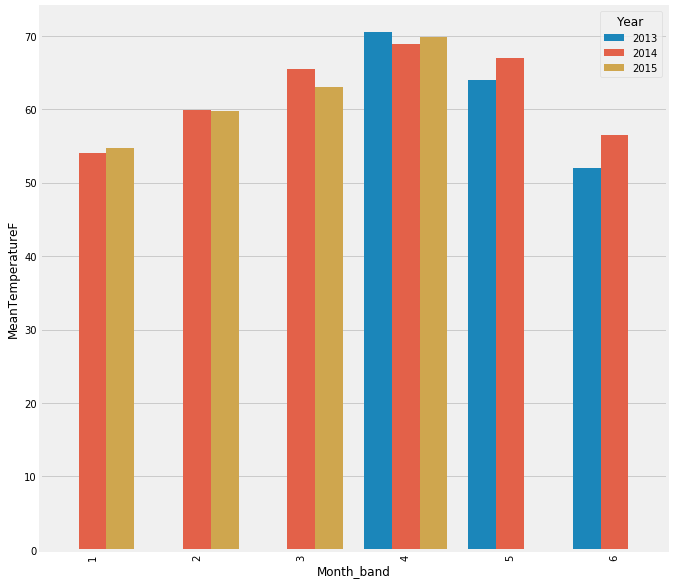

In [236]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x="Month_band", y="MeanTemperatureF", hue="Year", data=weather,ci=None)

In [235]:
weather.groupby(['Year','Month_band'])['MeanWindSpeedMPH'].mean().reset_index()

,Year,Month_band,MeanWindSpeedMPH
0,2013,4,6.800000
1,2013,5,5.413115
2,2013,6,3.065574
3,2014,1,4.267797
4,2014,2,6.681967
5,2014,3,7.734426
6,2014,4,7.364516
7,2014,5,5.577049
8,2014,6,4.931148
9,2015,1,3.959322


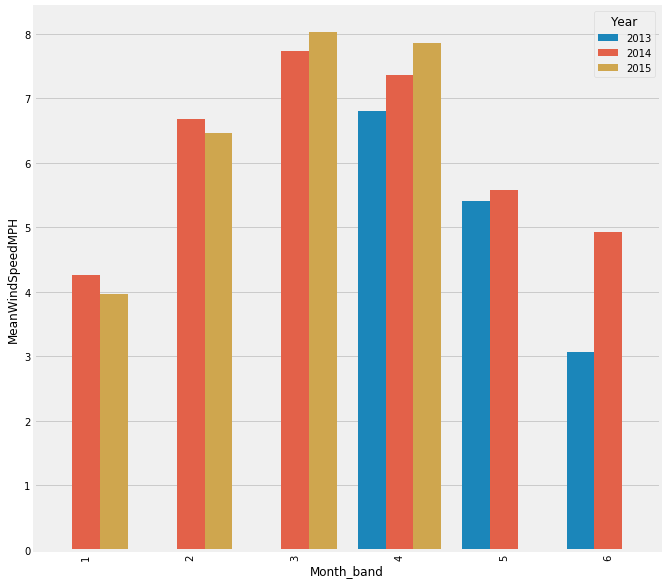

In [237]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x="Month_band",y="MeanWindSpeedMPH", hue="Year",data=weather,ci=None)

In [238]:
weather.groupby(['Year','Month_band'])['MeanHumidity'].mean().reset_index()

,Year,Month_band,MeanHumidity
0,2013,4,70.933333
1,2013,5,63.318033
2,2013,6,64.563934
3,2014,1,68.240678
4,2014,2,64.881579
5,2014,3,61.062500
6,2014,4,69.487013
7,2014,5,68.254181
8,2014,6,75.286792
9,2015,1,72.559322


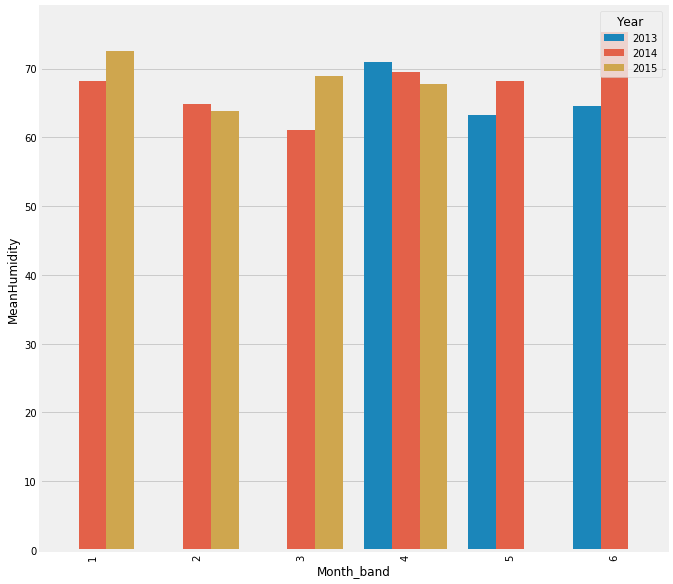

In [255]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x="Month_band", y="MeanHumidity", hue="Year", data=weather,ci=None)

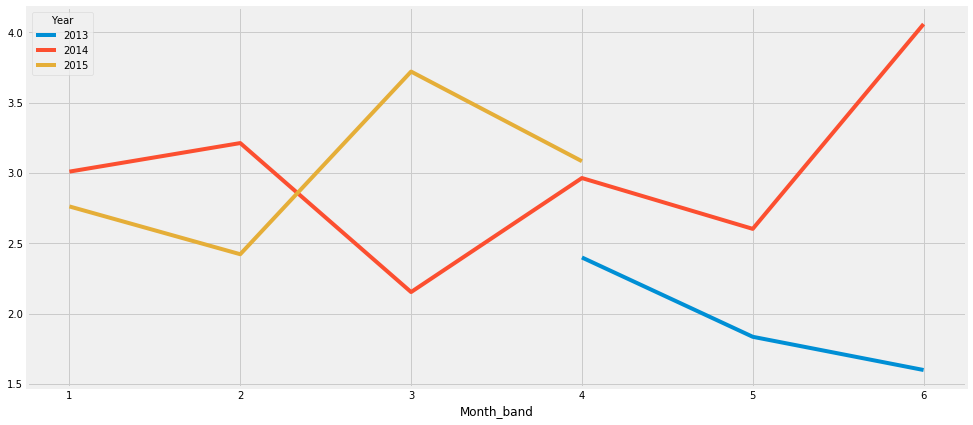

In [260]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
weather.groupby(['Month_band','Year']).mean()['CloudCover'].unstack().plot(ax=ax)

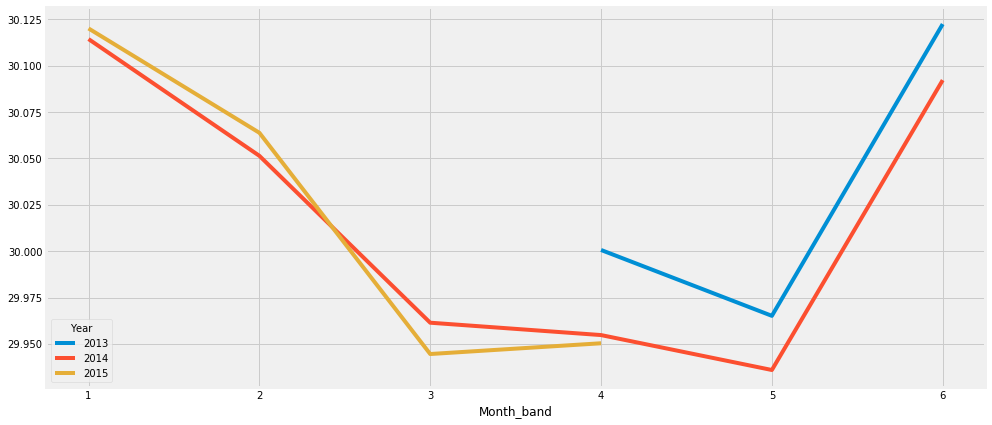

In [264]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
weather.groupby(['Month_band','Year']).mean()['MeanSeaLevelPressureIn'].unstack().plot(ax=ax)

In [266]:
weatherzip = weather.groupby(['Year','Zip'])['MeanTemperatureF'].mean().reset_index()
weatherzip

,Year,Zip,MeanTemperatureF
0,2013,94041,56.520000
1,2013,94063,58.072000
2,2013,94107,58.736000
3,2013,94301,59.112000
4,2013,95113,58.936000
5,2014,94041,62.397260
6,2014,94063,61.446575
7,2014,94107,61.071233
8,2014,94301,62.780822
9,2014,95113,62.473973


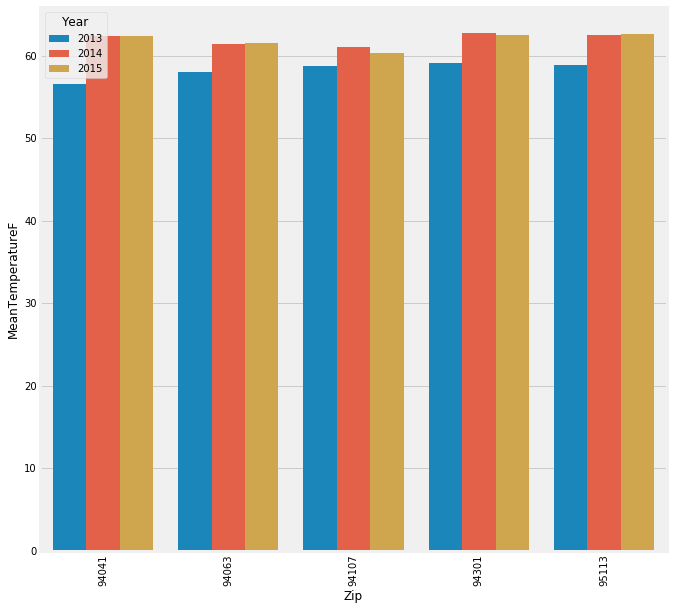

In [272]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x="Zip", y="MeanTemperatureF", hue="Year", data=weather,ci=None)

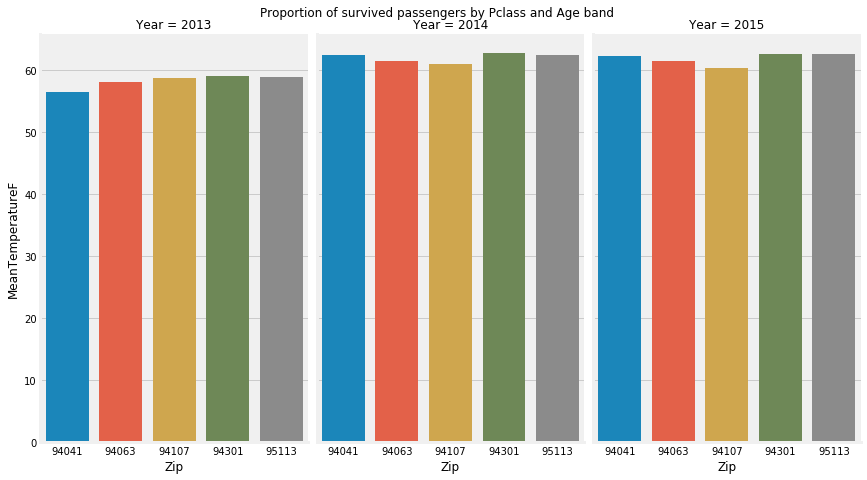

In [281]:
sns.factorplot('Zip','MeanTemperatureF',data=weather,col='Year',kind = 'bar',ci=None)
plt.gcf().set_size_inches(12, 7)
plt.suptitle('Proportion of survived passengers by Pclass and Age band')
plt.show()

In [286]:
weather2013 = weather.loc[weather['Year']<=2013]
weather2014 = weather.loc[weather['Year']==2014]
weather2015 = weather.loc[weather['Year']==2015]


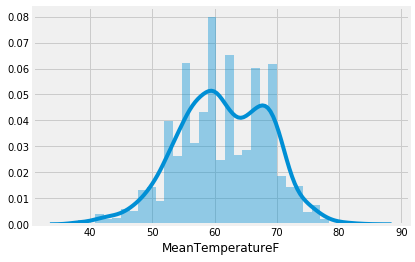

In [282]:
x = np.random.normal(size=100)
sns.distplot(weather2013['MeanTemperatureF']);

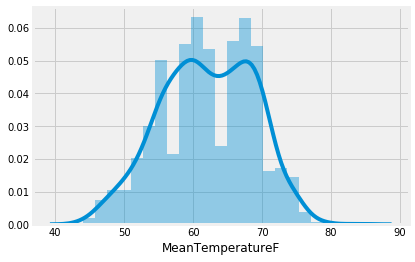

In [287]:
x = np.random.normal(size=100)
sns.distplot(weather2014['MeanTemperatureF']);

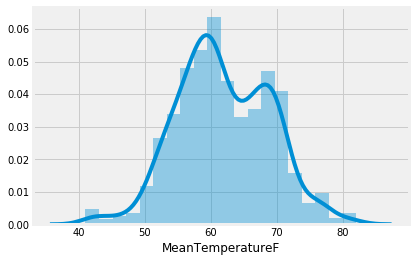

In [288]:
x = np.random.normal(size=100)
sns.distplot(weather2015['MeanTemperatureF']);